<a href="https://colab.research.google.com/github/Paulsob/TelecomLabs/blob/main/Lab01_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Упражнение 1

**5130901/20103**

**Соболев Павел**


Пункт 1

В файле chap01.ipynb представлены:

Создание сложных сигналов (синусоиды/косинусоиды).

Генерация объектов Wave и их воспроизведение.

Сегментация сигналов, чтение файлов, построение спектров.

Пункт 2

Библиотека ThinkDSP установлена из официального репозитория.

In [ ]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import thinkdsp

С сайта https://freesound.org/ скачан образец звука. Аудиофайл с расширением **.wav** содержит гитары.

In [ ]:
filename = './audio/guitar.wav'
audio = thinkdsp.Audio(filename=filename)
audio

Получим из аудиофайла объект Wave. Построим график.

C:\Users\Dmitriy\telecom\thinkdsp.py:1112: RuntimeWarning: overflow encountered in scalar absolute
  high, low = abs(max(ys)), abs(min(ys))


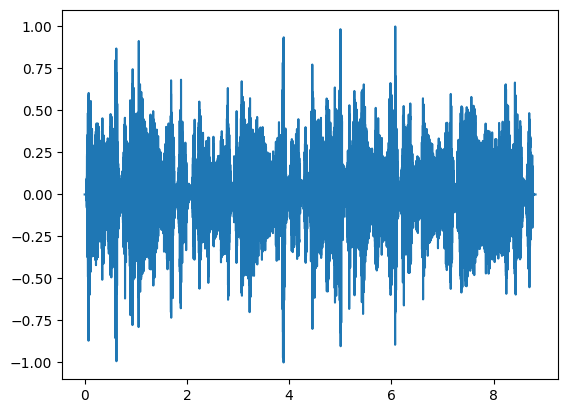

In [ ]:
wave = thinkdsp.read_wave(filename=filename)
wave.normalize()
wave.plot()

Выделим из объекта Wave сегмент длиной в 0.4 с.

In [ ]:
segment: thinkdsp.Wave = wave.segment(start=2.2, duration=0.7)
segment.make_audio()

Построим график сегмента.

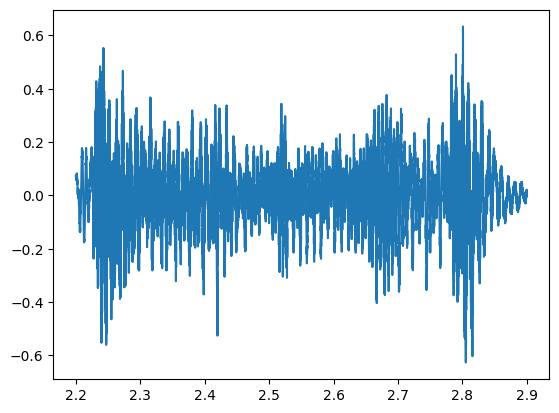

In [ ]:
segment.plot()

Построим спектр полученного сегмента. На сегменте виднен максимум амплитуды в районе 140 Гц -- основной тон. Из открытых источников узнаем, что нота ре имеет частоту в  146,83 Гц. Судя по всему, в данном сегменте играется именно эта нота.

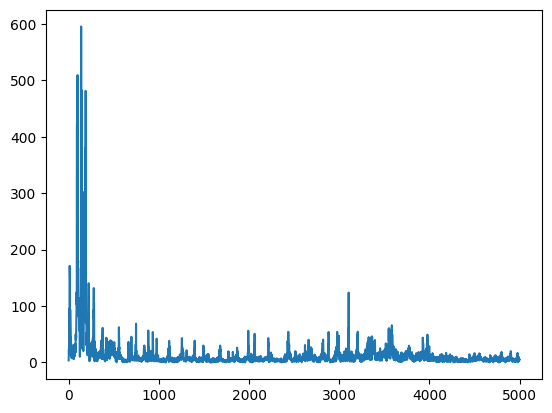

In [ ]:
spectrum: thinkdsp.Spectrum = segment.make_spectrum()
spectrum.plot(high=5000)

Узнаем, чему равна частота с наивысшей амплитудой. Полученное значение 595.52 Гц отличается от высоты ноты D₅(ре) (587.33 Гц).

In [ ]:
spectrum.peaks()[0]

(np.float64(595.5206159849831), np.float64(138.57142857142856))

Отфильтруем обертона спектра, оставив только те, чьи частоты не превышают 1000. Получим новый спектр. Его звук стал больше напоминать синтезированный звук, тембр скрипки безвозвратно утрачен. Тем не менее, основной тон остался прежним.

In [ ]:
spectrum_new: thinkdsp.Spectrum = spectrum.copy()
spectrum_new.low_pass(1000)
spectrum_new.make_wave().make_audio()

Построим полученный спектр, чтобы убедиться, что фильтрация произошла успешно.

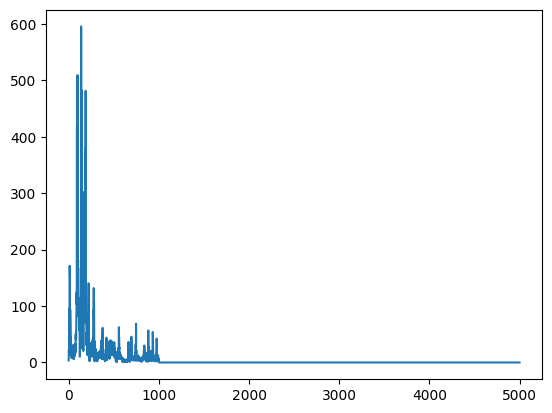

In [ ]:
spectrum_new.plot(high=5000)

Пункт 3

Создадим сложный сигнал на основе синусоидального и косинусоидального сигналов.

In [ ]:
sin_sig = thinkdsp.SinSignal(freq=337.87, amp=0.9, offset=0)
cos_sig = thinkdsp.CosSignal(freq=777.23, amp=0.7, offset=0)
mix1: thinkdsp.Signal = sin_sig + cos_sig
mix1_wave: thinkdsp.Wave = mix1.make_wave(duration=0.5, start=0, framerate=6025)
mix1_wave.make_audio()

Построим график небольшого сегмента полученного сигнала.

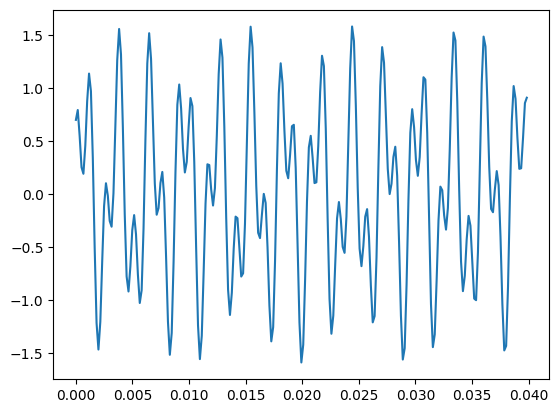

In [ ]:
mix1_wave.segment(start=0, duration=0.04).plot()

Также построим спектр сигнала. На нём видно 2 отдельных тона с заданными частотами.

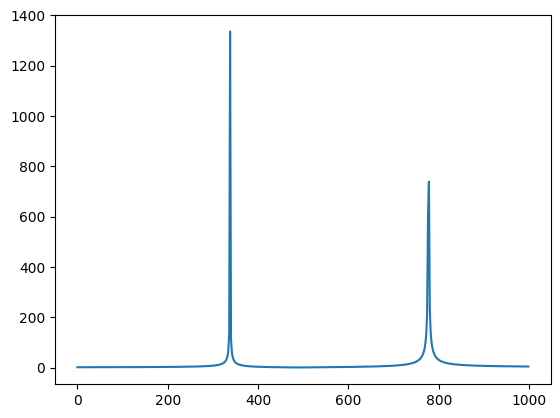

In [ ]:
mix1_spectrum: thinkdsp.Spectrum = mix1_wave.make_spectrum()
mix1_spectrum.plot(high=1000)

Добавим к сигналу частотную компоненту, не кратную двум исходным.

In [ ]:
mix2 = mix1 + thinkdsp.SinSignal(freq=440, amp=1, offset=0)

Внесем в сигнал дополнительную частоту, не кратную исходным. Результат:

Спектр отображает два четких тона с ожидаемыми частотами.

Визуализация короткого сегмента сигнала подтверждает изменения.

In [ ]:
mix2_wave: thinkdsp.Wave = mix2.make_wave(duration=0.5, start=0, framerate=6025)
mix2_wave.make_audio()

После обработки в спектре появляется новый пик с заданной частотой, но его симметрия нарушается.

При прослушивании заметна неестественная "напряженность" звука.

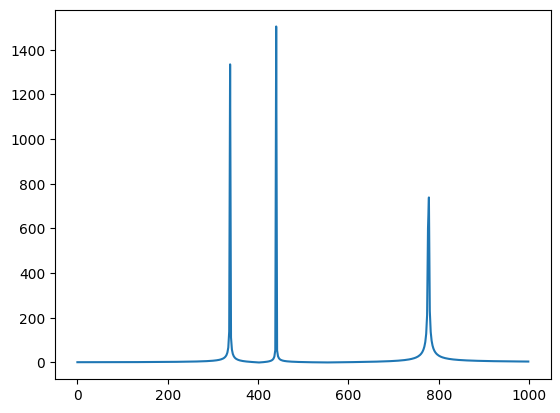

In [ ]:
mix2_spectrum: thinkdsp.Spectrum = mix2_wave.make_spectrum()
mix2_spectrum.plot(high=1000)

Пункт 4

Функция stretch изменяет скорость сигнала:

Массив ts (NumPy) умножается на коэффициент k.

Частота дискретизации framerate делится на k (увеличение скорости в 2 раза требует вдвое меньшего числа кадров, и наоборот).

In [ ]:
def stretch(w: thinkdsp.Wave, k: float) -> thinkdsp.Wave:
  w.ts *= k
  w.framerate /= k*1.5

Проверим работу функции stretch на аудиозаписи скрипки.

In [ ]:
wv: thinkdsp.Wave = thinkdsp.read_wave(filename='./audio/guitar.wav')
wv.make_audio()

Обработанный файл демонстрирует повышенную скорость воспроизведения и более высокий тон.

In [ ]:
stretch(wv, 0.5)
wv.make_audio()